# **The Sparks Foundation - Data Science And Business Analytics Internship**
## TASK 1 - Prediction of students scores using linear regression

### **Author: Aian Guanlao**

### **Data Preparation**

In [104]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [105]:
# Data cleaning if necessary
file = "student_scores.csv"
df = pd.read_csv(file)
print("Data imported successfully")

# Checking of null values
df.isnull().sum()

Data imported successfully


Hours     0
Scores    0
dtype: int64

In [106]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


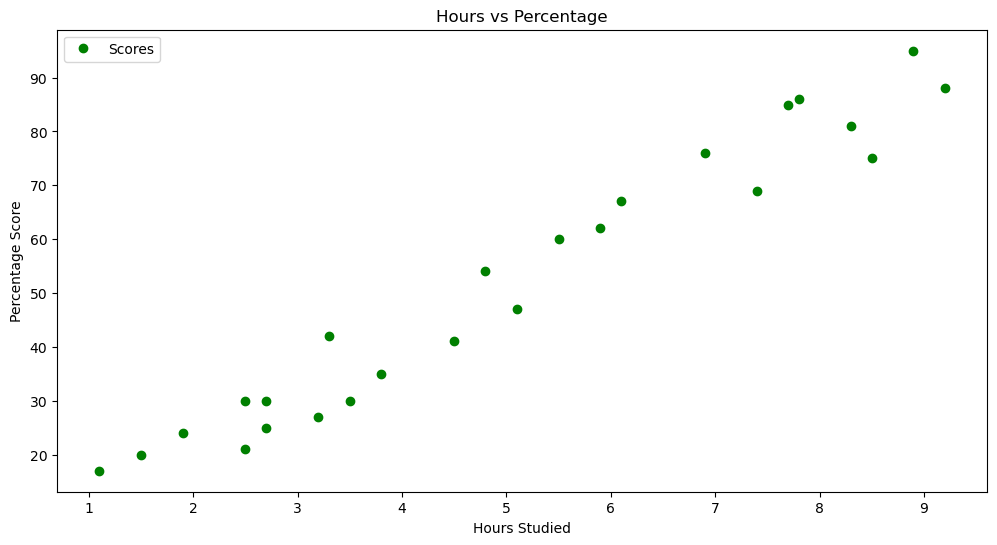

In [107]:
# Plotting the distribution of scores
plt.rcParams["figure.figsize"] = [12,6]
df.plot(x='Hours', y='Scores', style='o', color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can see that there is a positive correlation between the number of hours studied and percentage of score.

We will divide the data into "attributes" (inputs) and "labels" (outputs).


In [108]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [109]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [110]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


We will split the data into training and test sets by using Scikit-Learn's built-in train_test_split() method.

In [111]:
from sklearn.model_selection import train_test_split  
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.1, random_state=SEED) 

### **Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [112]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


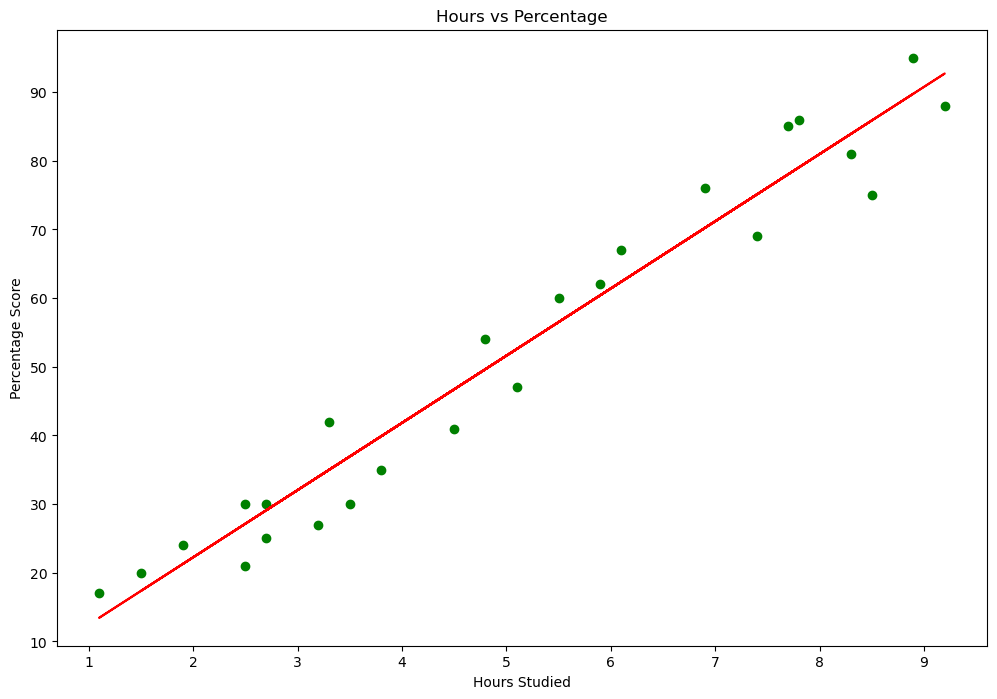

In [113]:
# Plotting the regression line
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.rcParams["figure.figsize"] = [12,8]
plt.scatter(X, y, color='green')
plt.plot(X, line, color='red');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [114]:
print(X_test) # Testing data - In Hours

y_pred = model.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]]


In [115]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.897278
1,30,27.150923
2,21,27.150923


In [116]:
# You can also test with your own data
hours = 5.1

own_pred = model.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 5.1
Predicted Score = 52.588944130782835


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9657593887812133
Mean Squared Error: 18.11510415783113
Root Mean Squared Error: 4.256184225081326
